In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
Y = iris.target
print('Class labels:', np.unique(Y))

Class labels: [0 1 2]


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y)

In [12]:
print('Labels counts in Y:', np.bincount(Y))

Labels counts in Y: [50 50 50]


In [13]:
print('Labels counts in Y_train:', np.bincount(Y_train))

Labels counts in Y_train: [35 35 35]


In [14]:
print('Labels counts in Y_test:', np.bincount(Y_test))

Labels counts in Y_test: [15 15 15]


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [17]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, Y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

In [18]:
Y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (Y_test != Y_pred).sum())

Misclassified samples: 3


In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(Y_test, Y_pred))

Accuracy: 0.93


In [20]:
print('Accuracy: %.2f' % ppn.score(X_test_std, Y_test))

Accuracy: 0.93


In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [34]:
def plot_decision_regions(X,Y,classifier,test_idx=None,
                         resolution=0.02):
    # setup marker generator and color map
    markers = ("s","x","o","^","v")
    colors = ("red","blue","lightgreen","gray","cyan")
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    
    #plot the decision surface
    X1_min, X1_max = X[:,0].min() -1, X[:, 0].max() + 1
    X2_min, X2_max = X[:,1].min() -1, X[:, 1].max() + 1
    XX1, XX2 = np.meshgrid(np.arange(X1_min, X1_max, resolution),
                           np.arange(X2_min, X2_max, resolution))
    Z = classifier.predict(np.array([XX1.ravel(), XX2.ravel()]).T)
    Z = Z.reshape(XX1.shape)
    plt.xlim(XX1.min(), XX1.max())
    plt.ylim(XX2.min(), XX2.max())
    
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],
                   alpha=0.8, c=colors[idx],
                   marker=markers[idx], label = cl,
                   edgecolor='black')
        
    #highlight test samples
    if test_idx:
        #plt all samples
        X_test, Y_test = X[test_idx, :], Y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                   c='', edgecolor='black', alpha=1.0,
                   linewidth=1, marker='o',
                   s=100, label='test set')

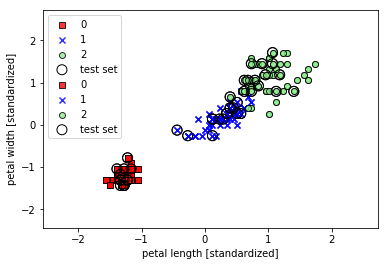

In [36]:
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined_std,
                      Y=Y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()